In [1]:
# import required functions and classes
import os

from sktime.datasets._data_io import _load_provided_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

DATA_PATH = os.path.join(os.getcwd(),"datasets","Multivariate_ts")

In [2]:
def _load_data_set(data_set_name="ArticularyWordRecognition", show_description=False):
    train_data = _load_provided_dataset(
        name=data_set_name,
        split="train",
        return_X_y=False,
        return_type=None,
        extract_path=DATA_PATH,
    )

    test_data = _load_provided_dataset(
        name=data_set_name,
        split="test",
        return_X_y=False,
        return_type=None,
        extract_path=DATA_PATH,
    )

    if show_description:
        print(f"Data set train instances: {train_data.shape[0]}")
        print(f"Train targets: {train_data.iloc[:,-1].value_counts().to_dict()}")
        train_instance_length = [
            train_data.iloc[instance, 0].shape[0] for instance in range(len(train_data))
        ]
        print(
            f"Train instance lengths: {pd.DataFrame(train_instance_length).value_counts().to_dict()}"
        )
        num_dimensions = len([col for col in train_data.columns if "dim" in col])
        print(f"The Train data has {num_dimensions} dimensions\n")

        print(f"Data set test instances: {test_data.shape[0]}")
        print(f"Test targets: {test_data.iloc[:,-1].value_counts().to_dict()}")
        test_instance_length = [
            test_data.iloc[instance, 0].shape[0] for instance in range(len(test_data))
        ]
        print(
            f"Test instance lengths: {pd.DataFrame(test_instance_length).value_counts().to_dict()}"
        )
        num_dimensions = len([col for col in test_data.columns if "dim" in col])
        print(f"The Test data has {num_dimensions} dimensions")

    return train_data, test_data

In [3]:
data_set_name = "ArticularyWordRecognition"

train_data, test_data = _load_data_set(data_set_name = data_set_name)
train_data.head(3)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,class_val
0,0 0.87159 1 0.88042 2 0.88042 3...,0 0.74530 1 0.82313 2 0.82313 3...,0 1.15330 1 1.08870 2 1.08870 3...,0 0.38622 1 0.30811 2 0.30811 3...,0 1.51560 1 1.51190 2 1.51190 3...,0 -0.71550 1 -0.72903 2 -0.72903 3...,0 0.88441 1 0.85476 2 0.85476 3...,0 1.13700 1 0.63292 2 0.63292 3...,0 1.2429 1 1.4795 2 1.4795 3 ...,1.0
1,0 2.74280 1 2.42650 2 2.42650 3...,0 1.4875 1 1.6060 2 1.6060 3 ...,0 1.19860 1 0.93703 2 0.93703 3...,0 1.3892 1 1.3780 2 1.3780 3 ...,0 2.96920 1 2.86290 2 2.86290 3...,0 -1.8594 1 -1.8413 2 -1.8413 3 ...,0 2.6193 1 2.3884 2 2.3884 3 ...,0 1.0217 1 1.1945 2 1.1945 3 ...,0 2.01640 1 0.83039 2 0.83039 3...,1.0
2,0 0.97990 1 1.00280 2 1.00280 3...,0 0.094518 1 0.181220 2 0.18122...,0 0.96637 1 0.98218 2 0.98218 3...,0 1.21560 1 1.22560 2 1.22560 3...,0 0.73842 1 0.74010 2 0.74010 3...,0 -0.54637 1 -0.59934 2 -0.59934 3...,0 0.41161 1 0.29903 2 0.29903 3...,0 0.47587 1 1.50300 2 1.50300 3...,0 0.76240 1 0.10234 2 0.10234 3...,1.0


In [4]:
def visualize_time_series(
    data_set_name, n_samples_per_class=10, max_number_classes=4, max_num_dimensions=5
):
    # Load the data
    train_data, test_data = _load_data_set(data_set_name=data_set_name)

    # Filter classes and dimensions
    classes = train_data["class_val"].unique()
    classes = (
        classes[:max_number_classes] if len(classes) > max_number_classes else classes
    )

    num_dimensions = min(
        max_num_dimensions, sum(["dim" in col for col in train_data.columns])
    )

    # Create subplots for each class and dimension
    fig, axes = plt.subplots(
        len(classes),
        num_dimensions,
        figsize=(12, 3 * len(classes)),
        sharex=True,
        sharey=True,
    )

    for i, target_class in enumerate(classes):
        # Filter the data for the current class
        class_data = train_data[train_data["class_val"] == target_class]

        if len(class_data) < n_samples_per_class:
            print(
                f"\n ATTENTION:\n len(class_data)= {len(class_data)} < n_samples_per_class {n_samples_per_class}"
            )
            n_samples_per_class = len(class_data)

        # Select n random samples from the target class
        class_samples = class_data.sample(n=n_samples_per_class)

        for dim in range(num_dimensions):
            for idx, row in class_samples.iterrows():
                # Plot the selected time series on the corresponding subplot with the same color
                axes[i][dim].plot(row[f"dim_{dim}"], color="b", alpha=0.3)

            # Calculate and plot the average line for the class (bold line)
            average_line = (
                class_samples[f"dim_{dim}"].apply(lambda x: pd.Series(x)).mean(axis=0)
            )
            axes[i][dim].plot(
                average_line, color="r", linewidth=2, label="Average", alpha=0.9
            )
            axes[i][dim].set_title(f"Target {target_class}, Dimension {dim}")

    # Adjust layout spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

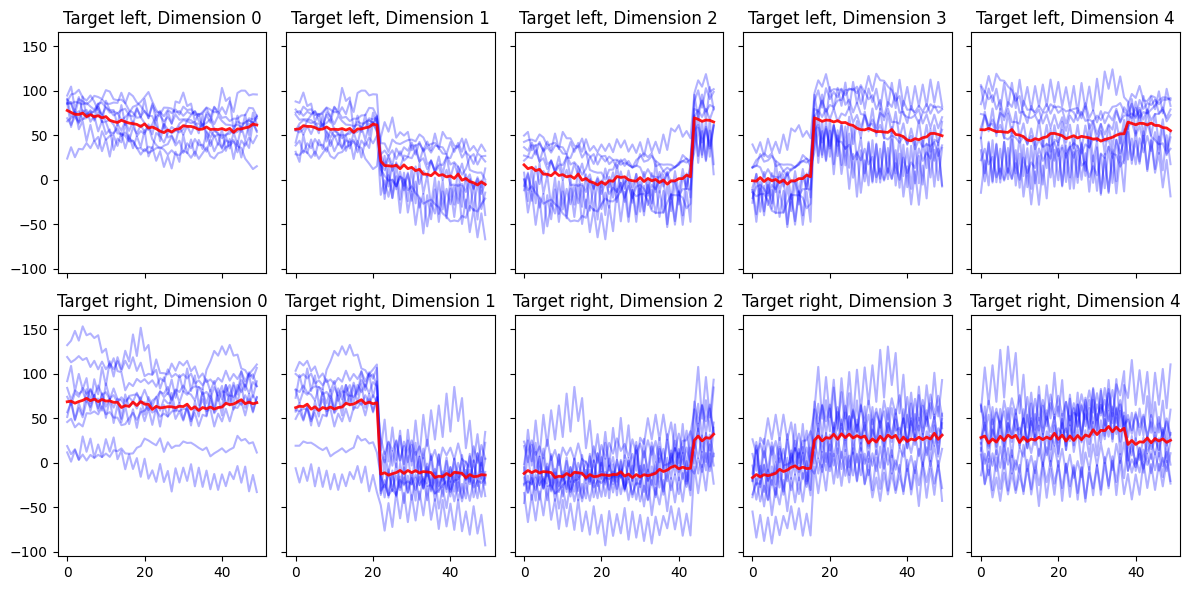

In [17]:
data_set_name="FingerMovements"

visualize_time_series(
    data_set_name=data_set_name,
    n_samples_per_class=10,
    max_number_classes=4,
    max_num_dimensions=5,
)

In [6]:
def _calculate_descriptive_performance(algorithm_data_set_performance_raw):
    # calculate the mean and std for algorithm_data_set_performance_raw
    mean_value = np.mean(algorithm_data_set_performance_raw)
    std_value = np.std(algorithm_data_set_performance_raw)

    # also calculate the min, max, and quantiles for algorithm_data_set_performance_raw
    min_value = np.min(algorithm_data_set_performance_raw)
    max_value = np.max(algorithm_data_set_performance_raw)
    quantiles_01 = np.quantile(algorithm_data_set_performance_raw, 0.01)
    quantiles_05 = np.quantile(algorithm_data_set_performance_raw, 0.05)
    quantiles_25 = np.quantile(algorithm_data_set_performance_raw, 0.25)
    quantiles_50 = np.quantile(algorithm_data_set_performance_raw, 0.50)
    quantiles_75 = np.quantile(algorithm_data_set_performance_raw, 0.75)
    quantiles_95 = np.quantile(algorithm_data_set_performance_raw, 0.95)
    quantiles_99 = np.quantile(algorithm_data_set_performance_raw, 0.99)

    buffer_dict = {}
    buffer_dict["mean"] = mean_value
    buffer_dict["std"] = std_value
    buffer_dict["min_value"] = min_value
    buffer_dict["quantiles_01"] = quantiles_01
    buffer_dict["quantiles_05"] = quantiles_05
    buffer_dict["quantiles_25"] = quantiles_25
    buffer_dict["quantiles_50"] = quantiles_50
    buffer_dict["quantiles_75"] = quantiles_75
    buffer_dict["quantiles_95"] = quantiles_95
    buffer_dict["quantiles_99"] = quantiles_99
    buffer_dict["max_value"] = max_value

    return buffer_dict

In [7]:
def _get_dataset_descriptives(data_set_name):
    print("data_set_name", data_set_name)
    train_data, test_data = _load_data_set(data_set_name=data_set_name)

    # count columns that contain string dim_ in train_data
    dim_count = train_data.filter(like="dim_").shape[1]

    # get the data shapes of train and test
    number_train_instances = len(train_data["dim_0"])
    length_train_instance = len(train_data["dim_0"][0])
    number_test_instances = len(test_data["dim_0"])
    length_test_instance = len(test_data["dim_0"][0])

    # get the number of target classes
    number_target_classes = len(train_data["class_val"].unique())

    # generate a dict with all values calculated above
    buffer_dict = {
        "dim_count": dim_count,
        "number_train_instances": number_train_instances,
        "length_train_instance": length_train_instance,
        "number_test_instances": number_test_instances,
        "length_test_instance": length_test_instance,
        "number_target_classes": number_target_classes,
    }

    return buffer_dict

In [8]:
# read csv from this path /Users/larsboecking/Documents/mv_timeseries/results/classification/Multivariate
import pandas as pd
import os
import numpy as np
from collections import defaultdict


# load the csv from datasets/material/summaryMultivariate.csv
import pandas as pd

path = os.path.join("results", "classification", "Multivariate")

# List all files in the current directory
algorithm_result = os.listdir(path)

buffer_dict = defaultdict(dict)
# Print the list of files
for index_algorithm, algorithm in enumerate(algorithm_result):
    # strip algorithm string by .csv at the end
    algorithm_name = algorithm.rstrip(".csv")

    algorithm_performance = pd.read_csv(os.path.join(path, algorithm))

    fold_columns = algorithm_performance.columns.drop("folds:")

    for index_data_set, row in algorithm_performance.iterrows():
        data_set_name = row["folds:"]
        
        if index_algorithm == 0: 
            buffer_dict[data_set_name]["descriptive"] = _get_dataset_descriptives(data_set_name)
            buffer_dict[data_set_name]["performance"] = {}

        # get the raw performance for the algorithm csv and the data set row
        algorithm_data_set_performance_raw = algorithm_performance.loc[algorithm_performance["folds:"] == data_set_name][
            fold_columns
        ].values.flatten()

        buffer_dict[data_set_name]["performance"][algorithm_name] = _calculate_descriptive_performance(
            algorithm_data_set_performance_raw
        )

data_set_name ArticularyWordRecognition
data_set_name AtrialFibrillation
data_set_name BasicMotions
data_set_name Cricket
data_set_name DuckDuckGeese
data_set_name EigenWorms
data_set_name Epilepsy
data_set_name EthanolConcentration
data_set_name ERing
data_set_name FaceDetection
data_set_name FingerMovements
data_set_name HandMovementDirection
data_set_name Handwriting
data_set_name Heartbeat
data_set_name Libras
data_set_name LSST
data_set_name MotorImagery
data_set_name NATOPS
data_set_name PenDigits
data_set_name PEMS-SF
data_set_name PhonemeSpectra
data_set_name RacketSports
data_set_name SelfRegulationSCP1
data_set_name SelfRegulationSCP2
data_set_name StandWalkJump
data_set_name UWaveGestureLibrary


In [19]:
algorithm_performance

,folds:,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,ArticularyWordRecognition,0.993333,0.993333,0.996667,0.983333,0.980000,0.990000,0.980000,0.993333,0.980000,...,0.990000,0.983333,0.990000,0.983333,0.983333,0.996667,0.976667,0.993333,0.980000,0.986667
1,AtrialFibrillation,0.400000,1.000000,0.733333,0.600000,0.600000,0.600000,0.866667,0.733333,0.733333,...,0.866667,0.733333,0.600000,1.000000,0.733333,0.600000,0.866667,0.600000,0.733333,0.600000
2,BasicMotions,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Cricket,0.986111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.986111,1.000000,1.000000,1.000000,1.000000,0.986111
4,Epilepsy,0.992754,0.978261,0.992754,0.992754,1.000000,0.992754,0.985507,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.992754,0.992754,1.000000,1.000000,0.992754
5,EthanolConcentration,0.475285,0.509506,0.467681,0.460076,0.471483,0.479087,0.467681,0.463878,0.505703,...,0.505703,0.467681,0.486692,0.490494,0.479087,0.479087,0.479087,0.471483,0.475285,0.570342
6,ERing,0.974074,0.981481,0.948148,0.985185,0.940741,0.966667,0.985185,0.992593,0.914815,...,0.985185,0.888889,0.977778,0.977778,0.970370,0.929630,0.970370,0.977778,0.985185,0.955556
7,FingerMovements,0.550000,0.570000,0.540000,0.540000,0.560000,0.540000,0.540000,0.500000,0.560000,...,0.500000,0.510000,0.560000,0.520000,0.540000,0.610000,0.510000,0.610000,0.610000,0.590000
8,HandMovementDirection,0.364865,0.432432,0.445946,0.445946,0.405405,0.486486,0.364865,0.351351,0.337838,...,0.324324,0.310811,0.378378,0.378378,0.391892,0.324324,0.324324,0.405405,0.378378,0.337838
9,Handwriting,0.522353,0.504706,0.523529,0.501176,0.535294,0.472941,0.520000,0.469412,0.505882,...,0.521176,0.520000,0.494118,0.561176,0.512941,0.534118,0.538824,0.511765,0.561176,0.515294


In [18]:
algorithm_data_set_performance_raw

array([0.93125 , 0.915625, 0.9125  , 0.90625 , 0.875   , 0.884375,
       0.90625 , 0.9     , 0.915625, 0.89375 , 0.9125  , 0.9375  ,
       0.9     , 0.88125 , 0.9375  , 0.884375, 0.90625 , 0.903125,
       0.921875, 0.89375 , 0.93125 , 0.890625, 0.86875 , 0.915625,
       0.9125  , 0.896875, 0.871875, 0.915625, 0.903125, 0.890625])

In [13]:
buffer_dict["FingerMovements"]

{'descriptive': {'dim_count': 28,
  'number_train_instances': 316,
  'length_train_instance': 50,
  'number_test_instances': 100,
  'length_test_instance': 50,
  'number_target_classes': 2},
 'performance': {'ResNet_ACC': {'mean': 0.547,
   'std': 0.03942503434790302,
   'min_value': 0.49,
   'quantiles_01': 0.49,
   'quantiles_05': 0.4945,
   'quantiles_25': 0.5125,
   'quantiles_50': 0.54,
   'quantiles_75': 0.57,
   'quantiles_95': 0.6154999999999999,
   'quantiles_99': 0.6271,
   'max_value': 0.63},
  'RSF_ACC': {'mean': 0.5443333333333332,
   'std': 0.03921592646985263,
   'min_value': 0.46,
   'quantiles_01': 0.4687,
   'quantiles_05': 0.49,
   'quantiles_25': 0.5125,
   'quantiles_50': 0.55,
   'quantiles_75': 0.57,
   'quantiles_95': 0.6054999999999999,
   'quantiles_99': 0.6171,
   'max_value': 0.62},
  'TSF_ACC': {'mean': 0.5316666666666666,
   'std': 0.04524623986832742,
   'min_value': 0.45,
   'quantiles_01': 0.4529,
   'quantiles_05': 0.46900000000000003,
   'quantiles_25

In [9]:
def _visualize_performance_data_set(data_set_name):
    
    data_set_performance = pd.DataFrame(buffer_dict[data_set_name]["performance"])
    data_set_descriptive = pd.DataFrame(
        buffer_dict[data_set_name]["descriptive"], index=[0]
    )
    data_set_descriptive

    # Extract algorithm names
    algorithm_names = [
        algorithm_name.strip("_ACC") for algorithm_name in data_set_performance.columns
    ]
    data_set_performance.index = [
        "$\hat{\mu}$",
        "$\hat{\sigma}$",
        "$Q_{min}$",
        "$Q_{0.01}$",
        "$Q_{0.05}$",
        "$Q_{0.25}$",
        "$Q_{0.50}$",
        "$Q_{0.75}$",
        "$Q_{0.95}$",
        "$Q_{0.99}$",
        "$Q_{max}$",
    ]

    # Set the figure size for better visualization
    plt.figure(figsize=(10, 6))

    # Generate the heatmap
    sns.heatmap(
        data_set_performance,
        cmap="coolwarm",
        annot=True,
        fmt=".2f",
        cbar=True,
        annot_kws={"size": 7},
    )

    # Add labels and title
    plt.xlabel("Algorithm", fontsize=15)
    plt.ylabel("Descriptive Performance", fontsize=15)  # Updated y-axis label
    plt.title(f"Performance on {data_set_name} [$ACC\%$]", fontsize=20)

    # Rotate the tick labels for better readability
    plt.xticks(
        range(len(algorithm_names)), algorithm_names, rotation=45, ha="center", fontsize=10
    )
    plt.yticks(rotation=0, fontsize=10)

    # Show the plot
    plt.grid(visible=True, linestyle="--", alpha=0.7)
    plt.tight_layout()  # Ensures that labels and ticks fit within the figure area
    plt.show()

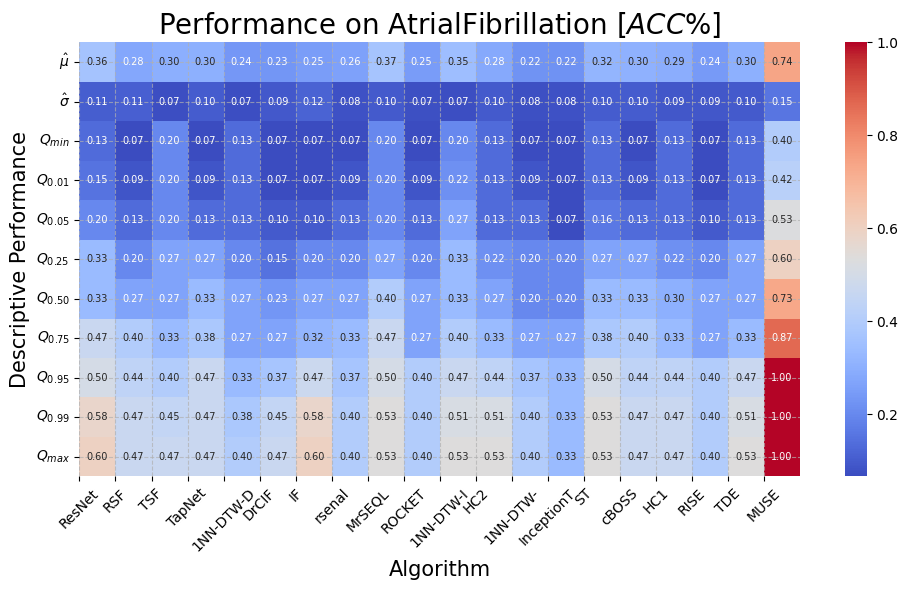

In [12]:
data_set_name = "AtrialFibrillation"
_visualize_performance_data_set(data_set_name)

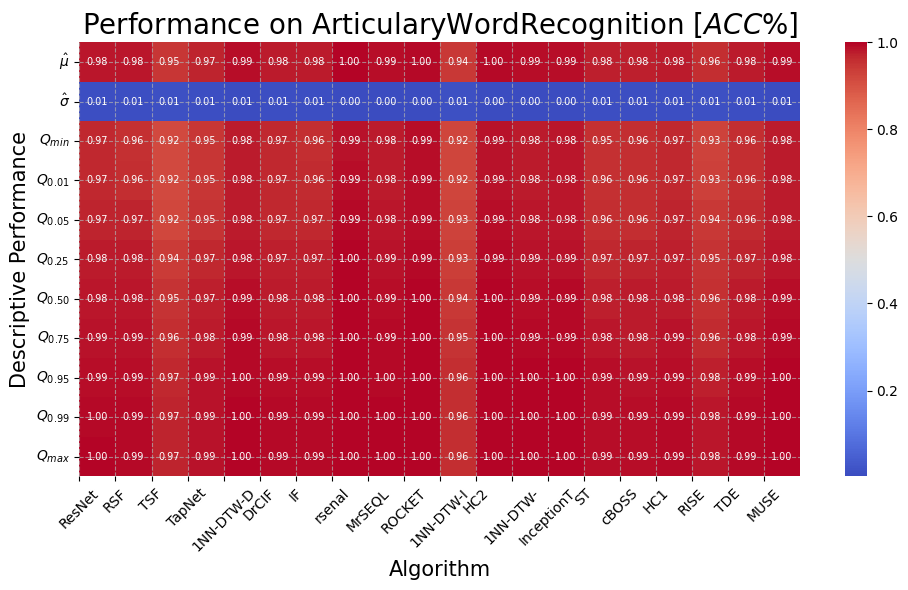

In [55]:
data_set_name = "ArticularyWordRecognition"
_visualize_performance_data_set(data_set_name)

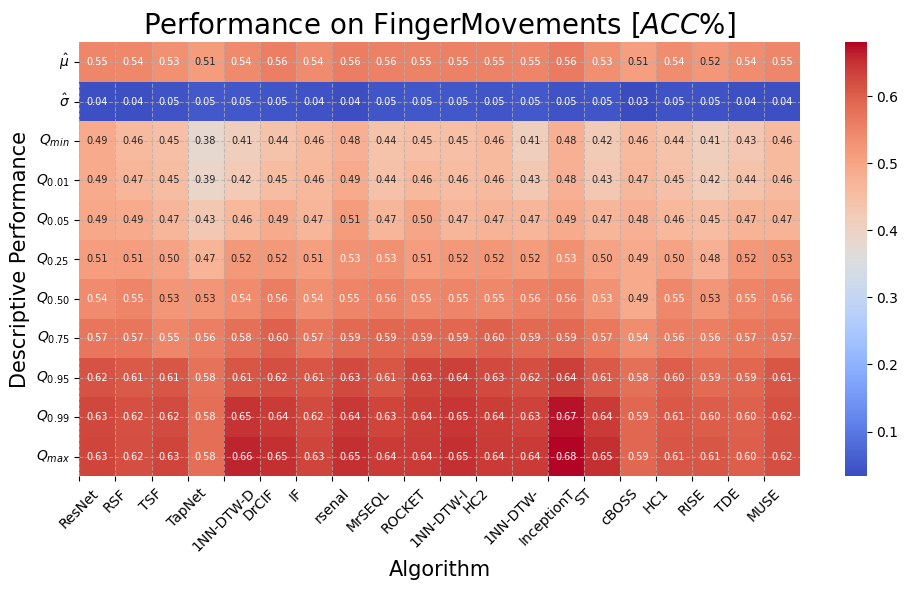

In [56]:
data_set_name = "FingerMovements"
_visualize_performance_data_set(data_set_name)

# TODO based on the descriptives of the data sets, predict the performance of different algortihm


- high level heatmap: datasets (y-axis), algorithm (x-axis), performance (color)
- analysis descriptives data set: datasets (x-axis), descriptes (y-axis), value (color)

- initial model: to predict performance (mean) based on descriptes of algorithm